<a href="https://colab.research.google.com/github/mouleenajaiswal1/Book-Recommendarion-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).**Recommender systems** are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.


**Dataset Overview**

The Book-Crossing dataset comprises 3 files - 

● Users : Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books : Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

● Ratings : Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "/content/drive/MyDrive/AlmaBetter/Capstone Project/Unsupervised Learning - Capstone Project/Data"

In [ ]:
users_df = pd.read_csv(file_path + "/Users.csv")
books_df = pd.read_csv(file_path + "/Books.csv")
ratings_df = pd.read_csv(file_path + "/Ratings.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print(users_df.shape)
print(ratings_df.shape)
print(books_df.shape)

(278858, 3)
(1149780, 3)
(271360, 8)


**-------------------------------------------------------------------------DATA PREPROCESSING---------------------------------------------------------------**

**Books DataFrame**

In [ ]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

*We can observe that Year-Of-Publication have some misleading values and Publisher values for those column is replaced by Image-URL. Author have publishing year*

In [ ]:
books_df[books_df['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
books_df[books_df['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
## Replacing Year-Of-Publication misleading values to actual year it was published which is given in Book-Author column
books_df.loc[(books_df['Year-Of-Publication'] == 'DK Publishing Inc'), 'Year-Of-Publication'] = 2000
books_df.loc[(books_df['Year-Of-Publication'] == 'Gallimard'), 'Year-Of-Publication'] = 2003

In [ ]:
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype('int')

In [ ]:
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

*116 unique values present. But now too there is misleading values. Such as year is 0 or even year is 2024,2038, etc. Let's handle this now.*

In [ ]:
books_df.loc[(books_df['Year-Of-Publication'] == 0) | (books_df['Year-Of-Publication'] > 2022)].nunique()

ISBN                   4631
Book-Title             4485
Book-Author            3314
Year-Of-Publication       7
Publisher              1002
Image-URL-S            4624
Image-URL-M            4624
Image-URL-L            4624
dtype: int64

*Thus, there are total 7 years where value is either 0 or greater than 2022. Let's change that value with np.nan*

In [ ]:
books_df.loc[(books_df['Year-Of-Publication'] == 0) | (books_df['Year-Of-Publication'] > 2022), 'Year-Of-Publication'] = np.nan

In [ ]:
books_df.loc[(books_df['Year-Of-Publication'] == 0) | (books_df['Year-Of-Publication'] > 2022)].nunique()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [ ]:
books_df.isna().sum()

ISBN                      0
Book-Title                0
Book-Author               1
Year-Of-Publication    4631
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               3
dtype: int64

*There are many nan values, let's replace it with the mean*

In [ ]:
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].mean()), inplace = True)

In [ ]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Dropping the unwanted features from books dataframe.

In [ ]:
books_df.drop(columns = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis = 1, inplace  = True)

In [ ]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


In [ ]:
books_df.duplicated().any()

False

*No duplicaed values in Books dataframe*

**Users Dataframe**

In [ ]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

*Many null values in Age column*

In [ ]:
users_df['Age'].nunique()

165

In [ ]:
users_df['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

*165 unique values for Age column with many misleaging values such as 239, 103, 104 and so on. Thus, we can replace this values with the mean but before that let's handle the NaN values.*

In [ ]:
users_df['Age'].fillna(round(users_df['Age'].mean()), inplace = True)

In [ ]:
users_df.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

*No null values now*

In [ ]:
users_df['Age'].describe()

count    278858.000000
mean         34.850164
std          11.202663
min           0.000000
25%          29.000000
50%          35.000000
75%          35.000000
max         244.000000
Name: Age, dtype: float64

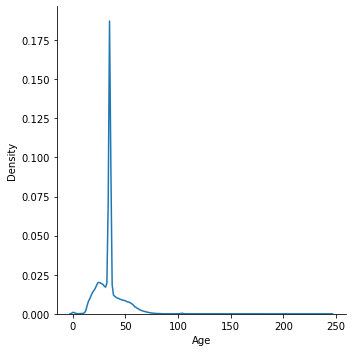

In [ ]:
sns.displot(users_df['Age'], kind='kde')

*Let's handle Age column by replacing values with mean of Age columns where age is less than 6 and greater than 75*

In [ ]:
users_df.loc[(users_df['Age'] < 6) | (users_df['Age'] > 75)]

,User-ID,Location,Age
219,220,"bogota, bogota, colombia",0.0
220,221,"palm beach, florida, usa",79.0
469,470,"indianapolis, indiana, usa",0.0
561,562,"adfdaf, australian capital territory, albania",0.0
612,613,"ankara, n/a, turkey",1.0
...,...,...,...
278301,278302,"düsseldorf, nordrhein-westfalen, germany",104.0
278317,278318,"studio city, california, usa",77.0
278348,278349,"carlin, nevada, usa",76.0
278412,278413,"kansas city, missouri, usa",76.0


In [ ]:
users_df.loc[(users_df['Age'] < 6) | (users_df['Age'] > 75), 'Age'] = 34

In [ ]:
users_df['Age'].nunique()

70

In [ ]:
users_df['Age'].unique()

array([35., 18., 17., 61., 26., 14., 25., 19., 46., 55., 32., 24., 20.,
       34., 23., 51., 31., 21., 44., 30., 57., 43., 37., 41., 54., 42.,
       50., 39., 53., 47., 36., 28., 13., 58., 49., 38., 45., 62., 63.,
       27., 33., 29., 66., 40., 15., 60., 22., 16., 65., 59., 48., 72.,
       56., 67., 52., 69., 71., 73.,  9., 64., 12., 74., 75., 68., 11.,
       70.,  8.,  7., 10.,  6.])

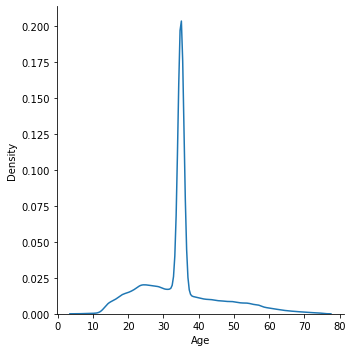

In [ ]:
sns.displot(x='Age', data=users_df, kind='kde')

In [ ]:
users_df.duplicated().any()

False

*No Duplicated records in Users Dataframe*

**Ratings Dataframe**

In [ ]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings_df['Book-Rating'].nunique()

11

In [ ]:
ratings_df['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [ ]:
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
ratings_df.duplicated().any()

False

*No null or duplicated values present in a Ratings dataframe. Thus, now we can go ahead with Exploratory Data Analysis*

**-------------------------------------------------------------EXPLORATORY DATA ANALYSIS--------------------------------------------------------------**

**Books Dataframe**

In [ ]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


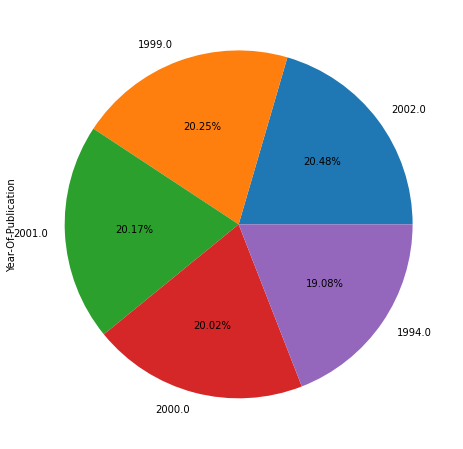

In [ ]:
plt.figure(figsize=(15,8))
books_df['Year-Of-Publication'].value_counts().head().plot(kind='pie', autopct='%1.2f%%')
plt.show()

Top 5 years with highest number of books published - 

2002 | 1999 | 2001 | 2000 | 1994

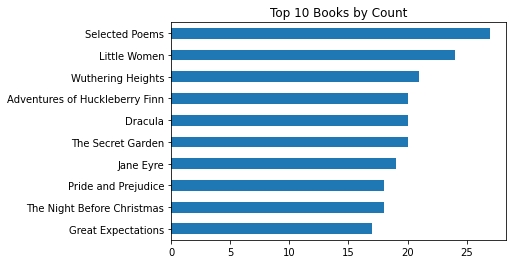

In [ ]:
books_df['Book-Title'].value_counts().head(10).sort_values().plot(kind='barh', title='Top 10 Books by Count')

*Selected Poems is the book having most number of readers.*

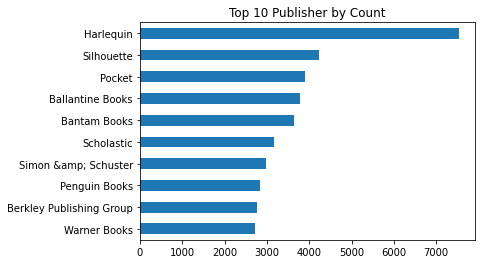

In [ ]:
books_df['Publisher'].value_counts().head(10).sort_values().plot(kind='barh', title='Top 10 Publisher by Count')

*Harlequin is the publisher for approximately around 7500 books.*

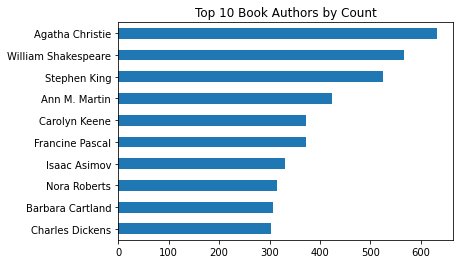

In [ ]:
books_df['Book-Author'].value_counts().head(10).sort_values().plot(kind='barh', title='Top 10 Book Authors by Count')

*Agatha Christie is the Author having most number of book.*

**Users Dataframe**

In [ ]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",35.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",35.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",35.0


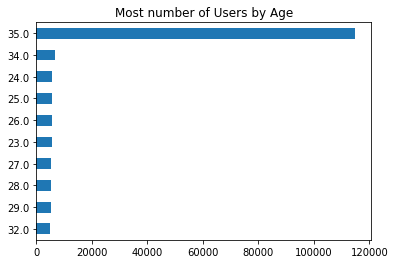

In [ ]:
users_df['Age'].value_counts().head(10).sort_values().plot(kind='barh',title='Most number of Users by Age')

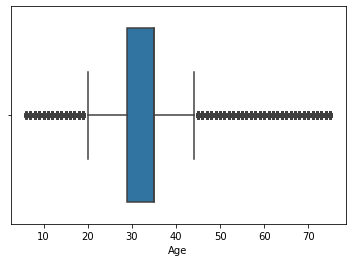

In [ ]:
sns.boxplot(x='Age', data=users_df)

*We can observe is the observation is below 20 or Above 45 then that observation is considered as an outlier*

**Ratings Dataframe**

In [ ]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


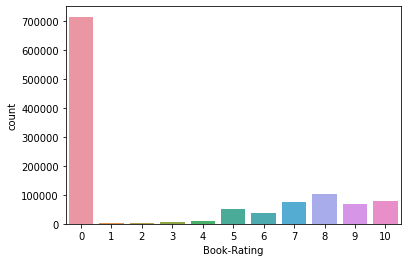

In [ ]:
sns.countplot(x='Book-Rating', data=ratings_df)

Highest rating is 8  out of 10. Which means most of the books are rated 8 by most of the users. 1 & 2 are on the lowest side.

In [ ]:
users_df['User-ID'].shape

(278858,)

In [ ]:
ratings_df['User-ID'].nunique()

105283

*We can observe in total there are 278858 users but out of them only 105283 have omly opted to give ratings for book.*

In [ ]:
ratings_df['User-ID'].shape

(1149780,)

*We can observe total ratings by users giving rate is 1149780.*

*Let's begin with building a Recommendation System.*

**---------------------------------------------Collaborative Filtering Using k - Nearest Neighbors----------------------------------------------------------**

Checking how many times individual user have rated the different books & also how many times individual book got ratings from different users.

In [ ]:
user_ratings_count = ratings_df['User-ID'].value_counts()

In [ ]:
user_ratings_count.describe()

count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: User-ID, dtype: float64

In [ ]:
book_ratings_count = ratings_df['ISBN'].value_counts()

In [ ]:
book_ratings_count.describe()

count    340556.000000
mean          3.376185
std          12.436252
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2502.000000
Name: ISBN, dtype: float64

In [ ]:
user_ratings_count.quantile(q=0.99)

174.0

In [ ]:
user_ratings_count[user_ratings_count > 174]

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
9908        175
173481      175
93426       175
41227       175
181076      175
Name: User-ID, Length: 1050, dtype: int64

*We can observe that 99% of users have given total rating 29 or less times. There are 1050 such users. So let's keep a threshold of 174 for users to ensure statistical significance.*

In [ ]:
book_ratings_count.quantile(q=0.99)

36.0

In [ ]:
book_ratings_count[book_ratings_count > 26]

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
              ... 
0553270222      27
0590568752      27
0140430105      27
880781210X      27
0345333756      27
Name: ISBN, Length: 5048, dtype: int64

*We can observe that 99% of the books have total numbver of rating count given by user as 26 or less. Keeping threshold for statistical significance as 26 for Books. There are 2377 such books.*

**To ensure statistical significance, users with less than 50 ratings, and books with less than 50 ratings are excluded.**

Filtering users with only 50 or more ratings.

In [ ]:
ratings_df = ratings_df[ratings_df['User-ID'].isin(user_ratings_count[user_ratings_count >= 50].index)]

In [ ]:
ratings_df

,User-ID,ISBN,Book-Rating
173,276847,0446364193,0
174,276847,3257200552,5
175,276847,3379015180,0
176,276847,3404145909,8
177,276847,3404148576,8
...,...,...,...
1149744,276688,0836236688,10
1149745,276688,0892966548,10
1149746,276688,1551669315,6
1149747,276688,1575660792,7


Filtering books with 50 or more ratings.

In [ ]:
ratings_df = ratings_df[ratings_df['ISBN'].isin(book_ratings_count[book_ratings_count >= 50].index)]

In [ ]:
ratings_df

,User-ID,ISBN,Book-Rating
173,276847,0446364193,0
182,276847,3426029553,8
413,276925,002542730X,10
426,276925,0316666343,0
427,276925,0345391810,0
...,...,...,...
1149714,276688,0553575090,7
1149715,276688,0553575104,6
1149724,276688,0679459618,0
1149726,276688,0679751521,0


**k - Nearest Neighbor is a popular machine learning algorithm which in this case will help us to find clusters of similar users based on common book ratings & make predictions using the average rating of top-k nearest neighbor.**

Combining **Rating** and **Book** dataframe using **ISBN** feature which is common in both.

In [ ]:
combined_book_rating_df = pd.merge(ratings_df, books_df, on='ISBN')

In [ ]:
combined_book_rating_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
...,...,...,...,...,...,...,...
142068,246156,0743406184,0,If Only It Were True,Marc Levy,2001.0,Pocket
142069,246617,0743406184,0,If Only It Were True,Marc Levy,2001.0,Pocket
142070,274308,0743406184,0,If Only It Were True,Marc Levy,2001.0,Pocket
142071,274325,0743406184,0,If Only It Were True,Marc Levy,2001.0,Pocket


We cam drop **Book-Author** ,**Year of Publication** & **Publisher** as we will not be needing that features.

In [ ]:
combined_book_rating_df = combined_book_rating_df.drop(columns=['Book-Author', 'Year-Of-Publication', 'Publisher'], axis=1)

In [ ]:
combined_book_rating_df.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels)
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels)
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels)
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels)
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels)


Grouping by book titles and creating a new column for total rating count.

In [ ]:
combined_book_rating_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
Book-Title     0
dtype: int64

In [ ]:
combined_book_rating_df.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels)
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels)
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels)
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels)
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels)


In [ ]:
book_rating_count_df = (combined_book_rating_df.
                        groupby(by=['Book-Title'])['Book-Rating'].
                        count().
                        reset_index().
                        rename(columns = {'Book-Rating' : 'Total Rating Count'})
                        [['Book-Title', 'Total Rating Count']]
                        )

In [ ]:
book_rating_count_df.head()

,Book-Title,Total Rating Count
0,16 Lighthouse Road,48
1,1984,103
2,1st to Die: A Novel,273
3,2010: Odyssey Two,59
4,204 Rosewood Lane,56


Combining the combined_book_rating with the book_rating_count to get the total rating counts. This gives us exactly what we need to find out which books are popular and filter out the lesser-known books.

In [ ]:
bookRating_with_totalRatingCount_df =  combined_book_rating_df.merge(book_rating_count_df, on='Book-Title', how='left')

In [ ]:
bookRating_with_totalRatingCount_df.tail()

,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count
142068,246156,0743406184,0,If Only It Were True,67
142069,246617,0743406184,0,If Only It Were True,67
142070,274308,0743406184,0,If Only It Were True,67
142071,274325,0743406184,0,If Only It Were True,67
142072,275970,0743406184,0,If Only It Were True,67


In [ ]:
bookRating_with_totalRatingCount_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),193
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),193
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),193
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),193
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),193


Keeping a threshold value to get book with 50 or more ratings only. Which will be just 1% as we saw above.

In [ ]:
bookRating_with_totalRatingCount_df.describe()

,User-ID,Book-Rating,Total Rating Count
count,142073.000000,142073.000000,142073.000000
mean,139750.666538,2.337911,118.674351
std,80553.665904,3.725655,106.109093
min,243.000000,0.000000,2.000000
25%,69405.000000,0.000000,50.000000
50%,138844.000000,0.000000,83.000000
75%,211344.000000,6.000000,150.000000
max,278843.000000,10.000000,852.000000


In [ ]:
popularity_threshold = 50
highly_rated_books_df = bookRating_with_totalRatingCount_df[bookRating_with_totalRatingCount_df['Total Rating Count'] > popularity_threshold]

In [ ]:
highly_rated_books_df.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),193
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),193
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),193
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),193
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),193
5,9177,0446364193,7,Along Came a Spider (Alex Cross Novels),193
6,11400,0446364193,0,Along Came a Spider (Alex Cross Novels),193
7,11676,0446364193,8,Along Came a Spider (Alex Cross Novels),193
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels),193
9,15418,0446364193,0,Along Came a Spider (Alex Cross Novels),193


In [ ]:
highly_rated_books_df.tail(10)

,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count
142063,217375,0743406184,0,If Only It Were True,67
142064,225087,0743406184,0,If Only It Were True,67
142065,231210,0743406184,0,If Only It Were True,67
142066,232131,0743406184,0,If Only It Were True,67
142067,238781,0743406184,10,If Only It Were True,67
142068,246156,0743406184,0,If Only It Were True,67
142069,246617,0743406184,0,If Only It Were True,67
142070,274308,0743406184,0,If Only It Were True,67
142071,274325,0743406184,0,If Only It Were True,67
142072,275970,0743406184,0,If Only It Were True,67


In [ ]:
highly_rated_books_df.shape

(105661, 5)

In [ ]:
highly_rated_books_df['Book-Title'].nunique()

1031

*We have 615 highly rated unqiue books.*

In [ ]:
highly_rated_books_df['User-ID'].nunique()

3210

In [ ]:
highly_rated_books_df['ISBN'].nunique()

1227

**------------------------------------------------------k - Nearest Neigbor Algorithm-------------------------------------------------------------**

k Nearest Neighbors (kNN) is a simple ML algorithm for classification and regression.kNN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using kNN algorithm. But one issue with kNN is that it is quiet slow.

**Why kNN is slow?**
 
 The reason kNN is slow is that - 

It as a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

Hence, to avoid this problem we will only take users from **USA** & **Canada** only.


In [ ]:
combined_df = highly_rated_books_df.merge(users_df, on='User-ID', how='left')

In [ ]:
combined_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count,Location,Age
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"köln, nordrhein-westfalen, germany",27.0
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"omaha, nebraska, usa",35.0
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"bayan lepas, penang, malaysia",20.0
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"sunnyvale, california, usa",49.0
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"los angeles, california, usa",28.0


In [ ]:
usa_canada_users_df = combined_df[combined_df['Location'].str.contains("usa|canada")] 

In [ ]:
usa_canada_users_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count,Location,Age
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"omaha, nebraska, usa",35.0
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"sunnyvale, california, usa",49.0
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"los angeles, california, usa",28.0
6,11400,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"ottawa, ontario, canada",49.0
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"providence, rhode island, usa",35.0


In [ ]:
usa_canada_users_df.shape

(93010, 7)

In [ ]:
usa_canada_users_df.drop(columns=['Age'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
usa_canada_users_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count,Location
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"omaha, nebraska, usa"
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"sunnyvale, california, usa"
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"los angeles, california, usa"
6,11400,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"ottawa, ontario, canada"
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"providence, rhode island, usa"


**Cosine Similarity**

We will use cosine similarity with respect to kNN. kNN helps us to compute the distance between two points (consider books as a point here). So, we can use cosine to find the angle of line between two distance. Cosine similarity gives us the similarity score between two points(books in this case).

We will convert dataframe into array.

In [ ]:
from scipy.sparse import csr_matrix

usa_canada_users_df = usa_canada_users_df.drop_duplicates(['User-ID', 'Book-Title'])
usa_canada_users_pivot = usa_canada_users_df.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)

In [ ]:
usa_canada_users_pivot

User-ID,243,254,507,638,741,882,1435,1674,1733,1848,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
usa_canada_users_matrix = csr_matrix(usa_canada_users_pivot.values)

In [ ]:
usa_canada_users_matrix

<1031x2409 sparse matrix of type '<class 'numpy.float64'>'
	with 26736 stored elements in Compressed Sparse Row format>

Finding Nearest Neighbors

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(usa_canada_users_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Selecting the one movie to test. Taking the whole row in pivot and finding out nearest neighbors using *model_knn.kneighbors*.

In [ ]:
query_index = np.random.choice(usa_canada_users_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(usa_canada_users_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 5)

0


Checking the values of movie selected by query_index.

In [ ]:
usa_canada_users_pivot.iloc[query_index, :].values.reshape(1, -1)

array([[0., 9., 0., ..., 0., 0., 0.]])

Checking the name of movie.

In [ ]:
usa_canada_users_pivot.index[query_index]

'1984'

Top 5 movies recommended based on similarity.

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendation for {usa_canada_users_pivot.index[query_index]}")
    else:
        print(f"{i}) {usa_canada_users_pivot.index[indices.flatten()[i]]} , with similarity of {round((1 - distances.flatten()[i]) * 100, 2)} %" )

Recommendation for 1984
1) Animal Farm , with similarity of 23.4 %
2) American Psycho (Vintage Contemporaries) , with similarity of 19.38 %
3) The Hitchhiker's Guide to the Galaxy , with similarity of 18.66 %
4) Brave New World , with similarity of 18.18 %


In [ ]:
usa_canada_users_df

,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count,Location
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"omaha, nebraska, usa"
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"sunnyvale, california, usa"
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"los angeles, california, usa"
6,11400,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"ottawa, ontario, canada"
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels),193,"providence, rhode island, usa"
...,...,...,...,...,...,...
105652,225087,0743406184,0,If Only It Were True,67,"toronto, ontario, canada"
105653,231210,0743406184,0,If Only It Were True,67,"roanoke, virginia, usa"
105655,238781,0743406184,10,If Only It Were True,67,"yucca valley, california, usa"
105658,274308,0743406184,0,If Only It Were True,67,"delray beach, florida, usa"


In [ ]:
# Keeping records where ratings are not 0.
usa_canada_users_df= usa_canada_users_df[usa_canada_users_df['Book-Rating'] != 0]

**Model Building & Training**

Recommender systems have a problem known as user cold-start, in which it is hard to provide personalized recommendations for users with none or a very few number of consumed items, due to the lack of information to model their preferences.  

For this reason, we are keeping in the dataset only users with at least 10 interactions.

In [ ]:
user_interactions_count_df = usa_canada_users_df.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('Number of users: %d' % len(user_interactions_count_df))

users_with_enough_interactions_df = user_interactions_count_df[user_interactions_count_df >= 10].reset_index()[['User-ID']]
print('Number of users with at least 10 interactions: %d' % len(users_with_enough_interactions_df))

Number of users: 2220
Number of users with at least 10 interactions: 955


In [ ]:
print('Number of interactions: %d' % len(usa_canada_users_df))
interactions_from_selected_users_df = usa_canada_users_df.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('Number of interactions from users with at least 10 interactions: %d' % len(interactions_from_selected_users_df))

Number of interactions: 26736
Number of interactions from users with at least 10 interactions: 20899


In [ ]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count,Location
0,243,0446606383,6,The Midnight Club,62,"arden hills, minnesota, usa"
1,243,0316776963,9,Me Talk Pretty One Day,255,"arden hills, minnesota, usa"
2,243,0449006522,6,Manhattan Hunt Club,58,"arden hills, minnesota, usa"
3,243,0316601950,9,The Pilot's Wife : A Novel,290,"arden hills, minnesota, usa"
4,243,044023722X,7,A Painted House,386,"arden hills, minnesota, usa"
5,243,0446364800,9,The General's Daughter,89,"arden hills, minnesota, usa"
6,243,0316899984,7,"River, Cross My Heart",116,"arden hills, minnesota, usa"
7,243,0060915544,10,The Bean Trees,204,"arden hills, minnesota, usa"
8,243,0060977493,7,The God of Small Things,153,"arden hills, minnesota, usa"
9,243,0385720106,7,A Map of the World,183,"arden hills, minnesota, usa"


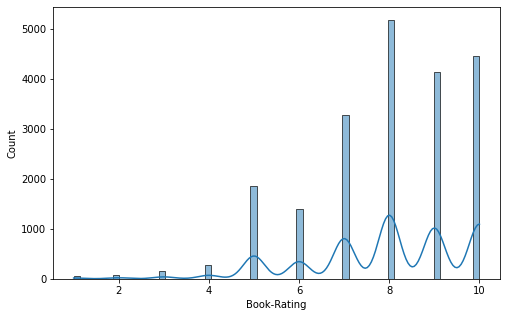

In [ ]:
# Before log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

Applying log transformation.

In [ ]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

Number of unique user/item interactions: 20899


,ISBN,User-ID,Book-Rating
0,002026478X,95359,3.459432
1,002026478X,104113,2.584963
2,002026478X,248718,3.459432
3,002026478X,264947,3.169925
4,002026478X,271448,2.584963


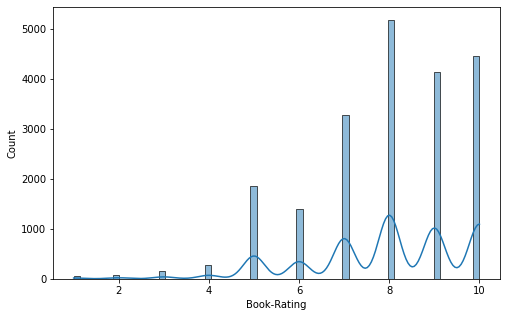

In [ ]:
## Plot after log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

Splitting dataset into train-test split.

In [ ]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(interactions_full_df,
                                     stratify = interactions_full_df['User-ID'],
                                     test_size = 0.20,
                                     random_state = 0
                                     )

print('Number of Train set: %d' % len(train_df))
print('Number of Test set: %d' % len(test_df))

Number of Train set: 16719
Number of Test set: 4180


In [ ]:
train_df.head()

,ISBN,User-ID,Book-Rating
18872,0743206029,39773,3.321928
789,0060987529,266865,2.584963
20328,0971880107,136139,1.584963
20058,0812550706,271176,3.459432
11363,0446360589,189558,3.169925


In [ ]:
test_df.head()

,ISBN,User-ID,Book-Rating
15435,0553275976,96357,3.321928
14526,0515121843,144531,3.169925
7949,0425097722,128835,3.169925
10195,0440217547,62272,3.321928
3978,0345339703,171118,3.169925


Creating a sparse pivot table with users as rows and book as columns for train_df.

In [ ]:
user_items_pivot = train_df.pivot(index = 'User-ID',
                                  columns = 'ISBN',
                                  values = 'Book-Rating'
                                  ).fillna(0)

In [ ]:
user_items_pivot.head()

ISBN,002026478X,002542730X,0060008032,006001203X,0060085444,0060096195,0060168013,006016848X,0060173289,0060175400,...,1573225517,1573225789,1573227331,1573228214,1573229326,1573229571,1573229725,1576737330,1592400876,1878424319
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_ids = list(user_items_pivot.index)
user_ids[:10]

[243, 254, 638, 882, 1435, 2276, 2766, 2891, 3167, 3373]

Creating a sparse matrix of pivot created above.

In [ ]:
user_items_matrix = user_items_pivot.values

In [ ]:
user_items_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 3.45943162, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**SVD - Latent Factor Model Collaborative Filtering**

SVD of Singular Value Decomposition a method from linear algebra that has been generally used as a dimensionality reduction technique in machine learning. SVD is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K < N). In the context of the recommender system, the SVD is used as a collaborative filtering technique. It uses a matrix structure where each row represents a user(User-ID in this case), and each column represents an item(Book ISBN in this case). The elements of this matrix are the ratings that are given to items by users(Book rating given by user). It provides another way to factorize a matrix, into singular vectors and singular values.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [ ]:
## Number of factors tp factor the the user-item matrix
NUMBER_OF_FACTORS = 35

## Performing matrix factorization of user_items_matrix
U, sigma, Vt = svds(user_items_matrix, k = NUMBER_OF_FACTORS)

In [ ]:
## Checking the shape of user_items_matrix and U

print(user_items_matrix.shape)
print(U.shape)

(955, 1222)
(955, 35)


In [ ]:
sigma = np.diag(sigma)
sigma.shape

(35, 35)

In [ ]:
Vt.shape

(35, 1222)

Reconstructing the original matrix by multiplying with its factors. The resulting matrix will no be sparse matrix. It is predicted values for the items user haven't yet interacted with. 

In [ ]:
predicted_user_ratings = np.dot(np.dot(U, sigma), Vt)

In [ ]:
predicted_user_ratings

array([[ 0.01658262, -0.0220575 ,  0.00143377, ..., -0.00997101,
        -0.0570089 ,  0.08859391],
       [-0.00221785, -0.08554052, -0.05197322, ...,  0.01764234,
         0.05870067,  0.08527407],
       [ 0.01152721,  0.02229621,  0.02767934, ...,  0.08389558,
         0.16844137,  0.20272861],
       ...,
       [-0.03406975,  0.08790837,  0.00334709, ..., -0.00100631,
         0.06508313,  0.05980029],
       [-0.00518621,  0.00390277,  0.0330896 , ...,  0.04901228,
         0.0680719 ,  0.02118436],
       [ 0.01590805,  0.06287774, -0.01269708, ..., -0.0209057 ,
        -0.04781043,  0.10075088]])

In [ ]:
predicted_user_ratings.shape

(955, 1222)

Creating a dataframe from predicted ratings for each user.

In [ ]:
## Converting predicted ratings matrix into dataframe

pred_df = pd.DataFrame(predicted_user_ratings, columns = user_items_pivot.columns, index = user_ids).transpose()

In [ ]:
pred_df.head()

,243,254,638,882,1435,2276,2766,2891,3167,3373,...,274061,274308,275970,276050,276165,276231,276680,277427,278026,278633
ISBN,,,,,,,,,,,,,,,,,,,,,
002026478X,0.016583,-0.002218,0.011527,-0.021410,0.019405,0.025006,0.024564,0.004840,-0.004790,0.008498,...,0.020933,-0.010232,-0.011736,0.017818,0.078407,-0.034912,0.014223,-0.034070,-0.005186,0.015908
002542730X,-0.022058,-0.085541,0.022296,0.001632,0.100533,0.021104,0.121860,-0.081497,0.059821,0.029680,...,0.036568,0.006711,0.071490,0.189958,0.164812,-0.111060,0.062522,0.087908,0.003903,0.062878
0060008032,0.001434,-0.051973,0.027679,-0.010476,0.036853,0.017741,-0.004298,0.005058,0.033468,0.018805,...,0.012257,0.032218,0.066352,0.004094,0.012647,0.021793,0.021118,0.003347,0.033090,-0.012697
006001203X,-0.054559,-0.002567,0.160421,-0.012430,0.014109,0.049441,-0.032911,-0.031510,0.006714,0.035335,...,-0.057022,-0.041405,-0.021008,0.018517,0.032845,-0.046619,0.095644,0.006540,0.026117,0.076272
0060085444,0.026311,0.050692,0.013939,0.002898,-0.038169,0.012150,-0.121897,-0.029767,-0.028443,0.002766,...,-0.071760,0.000775,-0.034379,0.117211,0.305922,-0.027570,-0.029836,0.081104,0.012975,-0.034105


**Creating a Recommender Class for Collaborative Filtering**

In [ ]:
import random

In [ ]:
class Recommender:

    MODEL_NAME = 'Collaborative Filtering'

    def __init__(self, predictions_df):
        self.predictions_df = predictions_df

    def get_model_name(self):
        return self.MODEL_NAME
    
    def recommend_items(self, user_id, items_to_ignore = [], topn = 10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df = recommendations_df.merge(books_df,on='ISBN',how='inner')
        recommendations_df = recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df

recommender_model = Recommender(pred_df)

**Recommender Model Evaluation**

In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

This evaluation method works as follows:

* For each user
    *  For each item the user has interacted in test set
        *  Sample 100 other items the user has never interacted.   
        *  Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        *  Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
*  Aggregate the global Top-N accuracy metrics

In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = train_df.set_index('User-ID')
interactions_test_indexed_df = test_df.set_index('User-ID')

The Top-N accuracy metric choosen was **Recall@N** which evaluates whether the interacted item is among the top N items (hit) in the ranked list of recommendations for a user.

In [ ]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(usa_canada_users_df['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()

Checking users having interaction of atleast 10 and present in out interaction_full_df.

In [ ]:
print(list(interactions_full_indexed_df.index.values))

[95359, 104113, 248718, 264947, 271448, 12538, 16996, 41084, 52584, 110934, 113270, 128835, 150979, 174216, 179734, 183995, 208671, 225763, 229741, 269566, 277427, 93426, 135149, 142715, 165308, 205980, 265115, 265889, 271705, 16795, 31315, 61854, 131046, 235282, 242106, 242143, 6563, 13552, 117251, 144531, 149934, 182993, 207148, 258185, 265889, 276165, 7125, 7346, 8067, 13552, 25409, 28204, 93426, 95173, 95359, 125692, 127359, 138198, 181687, 210874, 228868, 246507, 251422, 113270, 146803, 218608, 13850, 15049, 16634, 31556, 32802, 39281, 59150, 96440, 141491, 144478, 145369, 165308, 246513, 29526, 78448, 86189, 110912, 133747, 137589, 141710, 145641, 196502, 222035, 240219, 276050, 21014, 55187, 69078, 95359, 100459, 105214, 110912, 130571, 138578, 146803, 150979, 201677, 37712, 69078, 77809, 142256, 174326, 178920, 201677, 218552, 248464, 250184, 10447, 91058, 154730, 201677, 224349, 6563, 8245, 28177, 29526, 48046, 55187, 69078, 100459, 110912, 111174, 116904, 142524, 236757, 2422

Testing our model by taking input as user id.

In [ ]:
user=int(input("Enter User ID from above list for book recommendation:  "))
model_recommender.recommend_book(recommender_model,user)

Enter User ID from above list for book recommendation:  128835
Recommendation for User-ID =  128835
         ISBN                                         Book-Title  recStrength
0  0671027360                                Angels &amp; Demons     0.645795
1  0553284789  F Is for Fugitive (Kinsey Millhone Mysteries (...     0.542957
2  0345353145                                             Sphere     0.534913
3  0312924585                               Silence of the Lambs     0.499819
4  0452282152                          Girl with a Pearl Earring     0.494316
5  0449221482                                  J Is for Judgment     0.488719
6  0446310786                              To Kill a Mockingbird     0.481691
7  0449221512                                  I Is for Innocent     0.475776
8  0553280341  B Is for Burglar (Kinsey Millhone Mysteries (P...     0.457365
9  0446672211  Where the Heart Is (Oprah's Book Club (Paperba...     0.441396


In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(usa_canada_users_df['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        hits_at_15_count = 0

        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10
            hit_at_15, index_at_15 = self._verify_hit_top_n(item_id, valid_recs, 15)
            hits_at_15_count += hit_at_15

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        recall_at_15 = hits_at_15_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'hits@15_count':hits_at_15_count,
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10,
                          'recall@15': recall_at_15}
        return person_metrics

    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_15 = detailed_results_df['hits@15_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10,
                          'recall@15': global_recall_at_15}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
global_metrics, detailed_results_df = model_evaluator.evaluate_model(recommender_model)

print('\nGlobal metrics:\n%s' % global_metrics)
detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
954 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.2566985645933014, 'recall@10': 0.35909090909090907, 'recall@15': 0.4368421052631579}


,hits@5_count,hits@10_count,hits@15_count,interacted_count,recall@5,recall@10,recall@15,User-ID
127,5,6,10,34,0.147059,0.176471,0.294118,16795
74,5,7,10,29,0.172414,0.241379,0.344828,95359
45,10,12,14,28,0.357143,0.428571,0.500000,104636
77,8,8,9,22,0.363636,0.363636,0.409091,153662
10,4,5,6,21,0.190476,0.238095,0.285714,158295
278,15,17,17,20,0.750000,0.850000,0.850000,114368
216,9,10,14,19,0.473684,0.526316,0.736842,258534
223,3,5,7,19,0.157895,0.263158,0.368421,60244
23,8,10,11,17,0.470588,0.588235,0.647059,140358
66,1,1,2,16,0.062500,0.062500,0.125000,135149


We can observe that - 

recall@5 - 25% of the items were interacted by the user in test set from  top 5 recommendations.

recall@10 - 35% of items were interacted from top 10 recommendations.

recall@15 - 43% of items were interacted.


**Future Scope**

1. We can use content - based filtering on the available text columns such as book-title, publisher & author to come up with a content based recommendation system.

2. We can use NLP techniques such as TF-IDF for performing content - based filtering.

3. We can try to collect more data from various other sources if possible.

4. We can try to add description for the book so that content - based filtering can easily be performed.

5. We can also try to get reviews by the customer for every books.

6. Get more understanding about the domain and research more about recommendation system.


**Conclusion**

1. Started with EDA for the given 3 dataset of books, users & ratings.
2. Most number of books are read by people between 30 to 40 age.
3. 2002 have the highest number of books published followed by 1999.
4. Selected Poems is the book having most number of readers.
5. Harlequin is the publisher for approximately around 7500 books.
6. Agatha Christie is the Author having most number of book.
7. Highest rating is 8  out of 10. Which means most of the books are rated 8 by most of the users. 1 & 2 are on the lowest side (0 Rating is ignored).
8. Used k-NN to find similarity between users reading book using cosine similarity.
9. Trained model only for users from USA & Canada due to speed & time issues.
10. Selected users having 10 or more interactions.
11. Performed dimensionality reduction using SVD.
12. Built a model-based collaborative filtering recommendation class.
13. User Top-N metric for evaluation of recommender system.
14. * Recall@5 - 25%.
    * Recall@10 - 35%.
    * Recall@15 - 43%.